In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
# b_data = building data
b_data=pd.read_csv('content/building_metadata.csv').dropna(subset=['floor_count'])

In [3]:
b_data

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,105,1,105,Education,50623,NaN,5.0
1,106,1,106,Education,5374,NaN,4.0
2,107,1,107,Education,97532,2005.0,10.0
3,108,1,108,Education,81580,1913.0,5.0
4,109,1,109,Education,56995,1953.0,6.0
...,...,...,...,...,...,...,...
350,1051,12,1051,Education,28406,NaN,1.0
351,1052,12,1052,Retail,45305,NaN,2.0
352,1054,12,1054,Education,204998,NaN,4.0
353,1055,12,1055,Education,86714,NaN,4.0


In [4]:
pd.qcut( b_data['floor_count'], [0.25 , 0.5 , 0.75 , 1.0] )

0        (3.0, 5.0]
1        (3.0, 5.0]
2       (5.0, 26.0]
3        (3.0, 5.0]
4       (5.0, 26.0]
           ...     
350    (0.999, 3.0]
351    (0.999, 3.0]
352      (3.0, 5.0]
353      (3.0, 5.0]
354      (3.0, 5.0]
Name: floor_count, Length: 355, dtype: category
Categories (3, interval[float64, right]): [(0.999, 3.0] < (3.0, 5.0] < (5.0, 26.0]]

<AxesSubplot:ylabel='Frequency'>

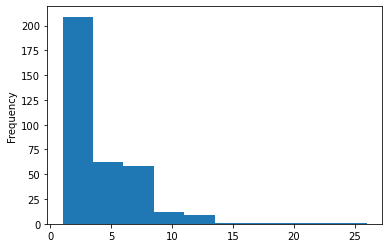

In [5]:
b_data.floor_count.plot(kind='hist')

In [6]:
b_data[b_data.floor_count<15]

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,105,1,105,Education,50623,NaN,5.0
1,106,1,106,Education,5374,NaN,4.0
2,107,1,107,Education,97532,2005.0,10.0
3,108,1,108,Education,81580,1913.0,5.0
4,109,1,109,Education,56995,1953.0,6.0
...,...,...,...,...,...,...,...
350,1051,12,1051,Education,28406,NaN,1.0
351,1052,12,1052,Retail,45305,NaN,2.0
352,1054,12,1054,Education,204998,NaN,4.0
353,1055,12,1055,Education,86714,NaN,4.0


In [7]:
pd.qcut( b_data[b_data.floor_count<15].floor_count , [0.25,0.5,0.75,1.0])

0        (2.0, 5.0]
1        (2.0, 5.0]
2       (5.0, 14.0]
3        (2.0, 5.0]
4       (5.0, 14.0]
           ...     
350    (0.999, 2.0]
351    (0.999, 2.0]
352      (2.0, 5.0]
353      (2.0, 5.0]
354      (2.0, 5.0]
Name: floor_count, Length: 351, dtype: category
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 5.0] < (5.0, 14.0]]

# we will work with the quantiles of the data without caring about outliers

we will assume that building between 1-3 floors as 0 for short
and 1 for medium between 3-5
and 2 for high more than 5

In [8]:
b_data['floor']=pd.qcut( b_data['floor_count'], [0.25 , 0.5 , 0.75 , 1.0], labels=['0','1','2'] )

In [9]:
b_data.head()

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor
0,105,1,105,Education,50623,NaN,5.0,1
1,106,1,106,Education,5374,NaN,4.0,1
2,107,1,107,Education,97532,2005.0,10.0,2
3,108,1,108,Education,81580,1913.0,5.0,1
4,109,1,109,Education,56995,1953.0,6.0,2


using the same method to create categories for square feet

to know how we will fill the missing values let's see the median


In [10]:
b_data.square_feet.describe()

count       355.000000
mean      72395.360563
std      102739.243998
min         356.000000
25%       14150.000000
50%       40085.000000
75%       93969.500000
max      875000.000000
Name: square_feet, dtype: float64

In [17]:
b_data['square_feet']= b_data['square_feet'].fillna( 72395 )

In [18]:
b_data['area']=pd.qcut( b_data['square_feet'] , [0.25,0.5,0.75,1.0], labels=[0 , 1 , 2])

In [21]:
b_data['area'].fillna(0,inplace=True)

In [22]:
b_data.head()

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,105,1,105,Education,50623,0.0,5.0,1,1
1,106,1,106,Education,5374,0.0,4.0,1,0
2,107,1,107,Education,97532,2005.0,10.0,2,2
3,108,1,108,Education,81580,1913.0,5.0,1,1
4,109,1,109,Education,56995,1953.0,6.0,2,1


In [24]:
b_data.to_csv('content/building_metadata.csv')

In [27]:
b_data

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,105,1,105,Education,50623,0.0,5.0,1,1
1,106,1,106,Education,5374,0.0,4.0,1,0
2,107,1,107,Education,97532,2005.0,10.0,2,2
3,108,1,108,Education,81580,1913.0,5.0,1,1
4,109,1,109,Education,56995,1953.0,6.0,2,1
...,...,...,...,...,...,...,...,...,...
350,1051,12,1051,Education,28406,0.0,1.0,0,0
351,1052,12,1052,Retail,45305,0.0,2.0,0,1
352,1054,12,1054,Education,204998,0.0,4.0,1,2
353,1055,12,1055,Education,86714,0.0,4.0,1,1


In [33]:
b_data[ b_data['floor'] == '1' ]

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,105,1,105,Education,50623,0.0,5.0,1,1
1,106,1,106,Education,5374,0.0,4.0,1,0
3,108,1,108,Education,81580,1913.0,5.0,1,1
11,116,1,116,Education,37265,0.0,5.0,1,0
12,117,1,117,Education,15489,2004.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...
337,1019,10,1019,Entertainment/public assembly,39788,0.0,5.0,1,0
348,1044,12,1044,Education,150673,0.0,4.0,1,2
352,1054,12,1054,Education,204998,0.0,4.0,1,2
353,1055,12,1055,Education,86714,0.0,4.0,1,1


In [34]:
b_data[ b_data['floor'] == '0' ]

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
47,152,1,152,Office,10301,1970.0,2.0,0,0
48,153,1,153,Office,16092,1965.0,3.0,0,0
51,565,4,565,Education,15326,1954.0,2.0,0,0
52,566,4,566,Education,2010,1957.0,1.0,0,0
54,568,4,568,Education,14150,1974.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...
346,1034,12,1034,Retail,3907,0.0,1.0,0,0
347,1039,12,1039,Education,30171,0.0,3.0,0,0
349,1050,12,1050,Office,50493,0.0,2.0,0,1
350,1051,12,1051,Education,28406,0.0,1.0,0,0


In [37]:
b_data[ b_data['floor'] == '2' ]

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
2,107,1,107,Education,97532,2005.0,10.0,2,2
4,109,1,109,Education,56995,1953.0,6.0,2,1
5,110,1,110,Education,27814,2006.0,8.0,2,0
6,111,1,111,Education,118338,1909.0,7.0,2,2
7,112,1,112,Education,32206,0.0,6.0,2,0
...,...,...,...,...,...,...,...,...,...
239,797,7,797,Education,764237,1979.0,13.0,2,2
240,798,7,798,Education,409028,1970.0,21.0,2,2
241,799,7,799,Education,527431,1976.0,26.0,2,2
244,802,7,802,Education,290625,1995.0,19.0,2,2
